# **MACHINE LEARNING & DATA ANALYSIS - FINAL PROJECT 2021/2022**

**Authors:**
*   Patrone Paolo (S4643377)
*   Raffo Matteo (S4620552)

**Chosen dataset:** [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

## **1. Reading and correction of the dataset**
In this section we read and acquire the dataset and replace the null values


**1.1. Importing Libraries**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Plot ROC-AUC
def auc_plot(model, x, y, label):
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(x)[:,1])
    auc = roc_auc_score(y,model.predict(x))
    print(label, auc)
    plt.plot(fpr, tpr, label=label)

**1.2. Importing Dataset**

In [3]:
df = pd.read_csv('data.csv')   # reading data into the dataframe
df.head()   # displaying first five rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
print("Dataset size (number of rows, number of columns):", df.shape)

Dataset size (number of rows, number of columns): (569, 33)


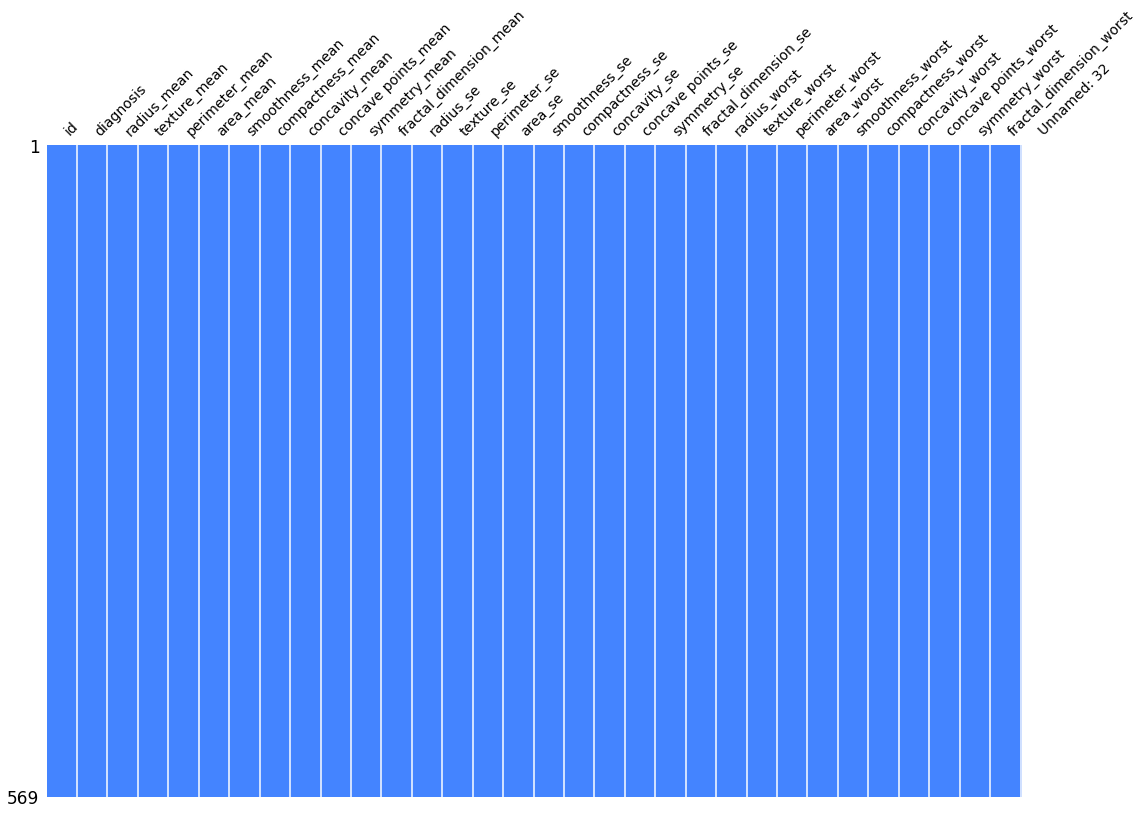

In [5]:
# Printing the matrix of each column to see where are the missing values
msno.matrix(df, sparkline=False, figsize=(18,12), fontsize=14, color=(0.27, 0.52, 1.0));
plt.show()

In [6]:
# Dropping 'Unnamed: 32' column
df.drop("Unnamed: 32", axis=1, inplace=True)

In [7]:
# Dropping id column
df.drop('id',axis=1, inplace=True)

## **2. Observations**
In this section we make some observations on our dataset, also with the help of some graphs.

We print the descriptive statistics table of the dataset.

In [8]:
# descriptive statistics of data
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**1.3 Data Visualizations**

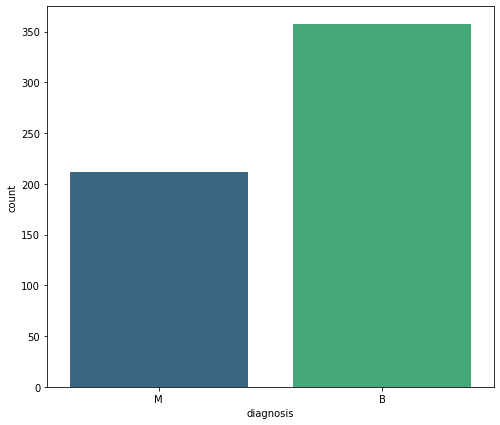

In [9]:
plt.figure(figsize = (8,7))
sns.countplot(x="diagnosis", data=df, palette='viridis')

**Observation:**
* In our dataset we can see that we have more benign than malignant tumors

In [10]:
fig = px.histogram(data_frame = df,
             x = "radius_mean",
             color="diagnosis", title="<b>diagnosis vs radius mean</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig1 = px.histogram(data_frame = df,
             x = "texture_mean",
             color="diagnosis", title="<b>diagnosis vs texture mean</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig.update_layout(bargap=0.2)
fig1.update_layout(bargap = 0.2)

fig.show()
fig1.show()

**Observations:**
* All cancer tumors of type B have radius mean less than 18 and most of them are between 12-12.99 of radius mean
* All cancer tumors of type M have radius mean greater than 10 and most of them are between 19-19.99 of radius mean
* Up to 19.99 texture mean value cancer tumors of type B are more
* From 19.99 texture mean value cancer tumors of type M are more

In [11]:
fig = px.histogram(data_frame = df,
             x = "perimeter_mean",
             color="diagnosis", title="<b>diagnosis vs perimeter mean</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig1 = px.histogram(data_frame = df,
             x = "area_mean",
             color="diagnosis", title="<b>diagnosis vs area mean</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig.update_layout(bargap=0.2)
fig1.update_layout(bargap = 0.2)

fig.show()
fig1.show()

**Observations:**
* All cancer tumors of type B have perimeter mean less than 110-115 and most of them are between 75-80 of perimeter mean.
* All cancer tumors of type M have radius greater than 70 and most of them are between 130-135 of perimeter mean
* Up to 700 area mean value cancer tumors of type B are more
* From 700 texture mean value cancer tumors of type M are more

In [12]:
tpc = pd.DataFrame(df.groupby(['diagnosis']).mean())
tpc['tpc'] = tpc.index
tpc = tpc.reset_index()
fig = make_subplots(rows=1,
                    cols=1)

fig.add_trace((go.Scatter(x=df[df['diagnosis']=='M']['perimeter_mean'],
                          showlegend=False,
                          text='M',
                   y = df[df['diagnosis']=='M']['area_mean'],
                          name='M',
                          mode='markers',
                  marker = dict(color= 'cornflowerblue',
                                size=6,
                                opacity = 0.5))),
              row=1,col=1)
fig.add_trace((go.Scatter(x=df[df['diagnosis']=='B']['perimeter_mean'],
                          showlegend=False,
                          text='B',
                   y = df[df['diagnosis']=='B']['area_mean'],
                          name='B',
                          mode='markers',
                  marker = dict(color= 'darkorange',
                                size=6,
                                opacity = 0.5))),
              row=1,col=1)

fig.update_xaxes(title_text="perimeter_mean", row=1, col=1)
fig.update_yaxes(title_text="area_mean", row=1, col=1)

fig.show()

**Observation:**
* The majority of tumors of type M have more perimeter and area mean than type B tumors

## **3. Data Preprocessing**

**3.1 Data Preprocessing**

In [13]:
# counts of unique rows in the 'diagnosis' column
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [14]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**3.2 Label Encoder**

We convert the Categorical Columns into Numerical by mapping each category to an integer value using LabelEncoder()

In [15]:
# Trasforming categorical values to numerical values
le = LabelEncoder()   # we use LabelEncoder()

# We apply the transformation to the data of the column diagnosis
df["diagnosis"] = le.fit_transform(df["diagnosis"])

In [16]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**3.3 Train Test Split**

In [17]:
# we split x and y into random train and test subsets (20% of the data of the dataset is used in the test split)
rs = 12
X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis', axis=1), df['diagnosis'], test_size=0.3, random_state=rs)

print("Number transations x_train df", X_train.shape)
print("Number transations x_test df", X_test.shape)
print("Number transations y_train df", y_train.shape)
print("Number transations y_test df", y_test.shape)

Number transations x_train df (398, 30)
Number transations x_test df (171, 30)
Number transations y_train df (398,)
Number transations y_test df (171,)


**3.4 SMOTE**

We have an imbalanced data. Standard ML methods, such as Decision Tree, tend to deviate from the majority class and tend to ignore the minority class. They tend to only predict the majority class, hence have a significant misclassification of the minority class as compared to the majority class. So we use a technique called as SMOTE (Synthetic Minority Oversampling Technique).

In [18]:
print("Before OverSampling, counts of label 1: {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label 0: {}\n".format(sum(y_train==0)))

Before OverSampling, counts of label 1: 148
Before OverSampling, counts of label 0: 250



In [19]:
# Dataset scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

sm = SMOTE(random_state=rs)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After OverSampling, the shape of train_x: {}".format(X_train_res.shape))
print("After OverSampling, the shape of train_y: {}".format(y_train_res.shape))

print("After OverSampling, counts of label 1: {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label 0: {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_x: (500, 30)
After OverSampling, the shape of train_y: (500,)
After OverSampling, counts of label 1: 250
After OverSampling, counts of label 0: 250


## **4. Prediction without tuning of model parameters**
In this section we train our models on our dataset without tuning of model parameters. Finally we compare the models.

### **Decision Tree Classifier**

In [20]:
dtc = DecisionTreeClassifier(random_state=rs)
dtc.fit(X_train_res, y_train_res)
predictions1 = dtc.predict(X_test)

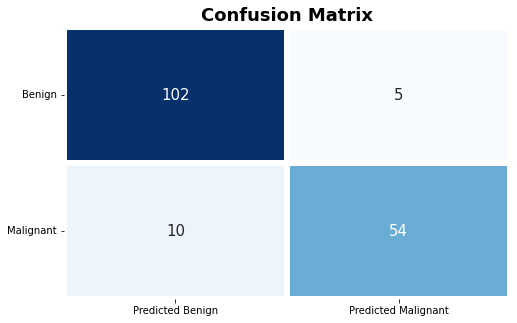



              precision    recall  f1-score   support

           0       0.91      0.95      0.93       107
           1       0.92      0.84      0.88        64

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



In [21]:
cm = confusion_matrix(y_test, predictions1)

# We visualize the confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap="Blues", annot=True, fmt="d", linewidths=5, cbar=False, annot_kws={"fontsize":15}, yticklabels=["Benign", "Malignant"], xticklabels=["Predicted Benign", "Predicted Malignant"])
plt.yticks(rotation=0)
plt.title("Confusion Matrix", y=1.1, weight="bold", fontsize=18)
plt.show()

print("\n")
print(classification_report(y_test, predictions1))

In [22]:
print("Accuracy of Decision Tree Model is: ", accuracy_score(y_test, predictions1))

Accuracy of Decision Tree Model is:  0.9122807017543859


### **Random Forest Classifier**

In [23]:
rfc = RandomForestClassifier(random_state=rs)
rfc.fit(X_train_res, y_train_res)
predictions2 = rfc.predict(X_test)

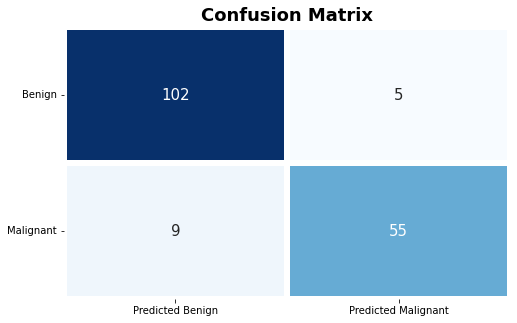



              precision    recall  f1-score   support

           0       0.92      0.95      0.94       107
           1       0.92      0.86      0.89        64

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



In [24]:
cm = confusion_matrix(y_test, predictions2)

# We visualize the confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap="Blues", annot=True, fmt="d", linewidths=5, cbar=False, annot_kws={"fontsize":15}, yticklabels=["Benign", "Malignant"], xticklabels=["Predicted Benign", "Predicted Malignant"])
plt.yticks(rotation=0)
plt.title("Confusion Matrix", y=1.1, weight="bold", fontsize=18)
plt.show()

print("\n")
print(classification_report(y_test, predictions2))

In [25]:
print("Accuracy of Random Forests Model is: ", accuracy_score(y_test, predictions2))

Accuracy of Random Forests Model is:  0.9181286549707602


**2.2 Splitting the data into train and test**

## **5. Prediction with tuning of model parameters**
In this section we find the best parameters for each model and use them to test all models. In this case to evaluate and estimate the skill of machine learning models we use metrics such as: Accuracy Score, ROC AUC Score, Precision, Recall and F1 Score. Finally, thanks to these metrics, we are able to compare the models at the end of testing.

We use as tuned paramiters of classifier models:

*   **Decision Tree**
    
    *Parameters*:
    
    * **`max_depth`**:
    
     The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    
    * **`min_samples_leaf`**:
    
     The minimum number of samples required to be at a leaf node.
    
    * **`max_leaf_nodes`**:

     Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

---

*   **Random Forest**
    
    *Parameters*:
    
    * **`max_depth`**:
    
     The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    
    * **`max_features`**:
    
     The number of features to consider when looking for the best split. If "auto", then `max_features=sqrt(n_features)`.
    
    * **`min_samples_leaf`**:
    
     The minimum number of samples required to be at a leaf node.
    
    * **`min_samples_split`**:
    
     The minimum number of samples required to split an internal node.

In [26]:
DT_grid_models = dict(max_depth=list(range(1, 11)), max_features=list(range(1, 11)), random_state=[rs])
RF_grid_models = dict(max_depth=list(range(1, 21)), max_features=list(range(1, 11)), n_estimators=[100], random_state=[rs])

DT = DecisionTreeClassifier()
RF = RandomForestClassifier()

In [27]:
DTC_grid = GridSearchCV(estimator=DT, param_grid=DT_grid_models, scoring="accuracy", cv=10)
RFC_grid = GridSearchCV(estimator=RF, param_grid=RF_grid_models, scoring="accuracy", cv=10)

DT_best = DTC_grid.fit(X_train_res, y_train_res)
best_param = DT_best.best_params_
print(" {}:\n Best Parameters: {}\n".format(DT, best_param))
print("\033[1m", "\033[96m", "-"*100, "\n", "\033[0m")

RF_best = RFC_grid.fit(X_train_res, y_train_res)
best_param = RF_best.best_params_
print(" {}:\nBest Parameters: {}\n".format(RF, best_param))
print("\033[1m", "\033[96m", "-"*100, "\n", "\033[0m")

 DecisionTreeClassifier():
 Best Parameters: {'max_depth': 4, 'max_features': 9, 'random_state': 12}

  ---------------------------------------------------------------------------------------------------- 
 
 RandomForestClassifier():
Best Parameters: {'max_depth': 4, 'max_features': 2, 'n_estimators': 100, 'random_state': 12}

  ---------------------------------------------------------------------------------------------------- 
 


  #####  DecisionTreeClassifier algorithm  #####
 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       107
           1       0.94      0.80      0.86        64

    accuracy                           0.91       171
   macro avg       0.92      0.88      0.90       171
weighted avg       0.91      0.91      0.90       171

ROC AUC score:  0.88
Accuracy Score: 0.906



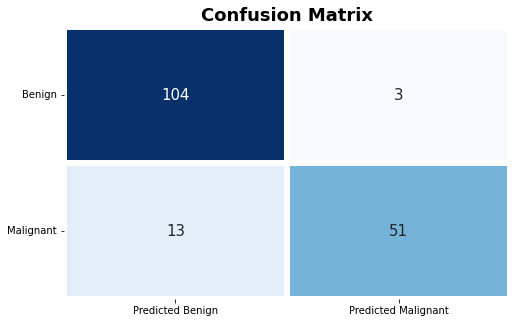

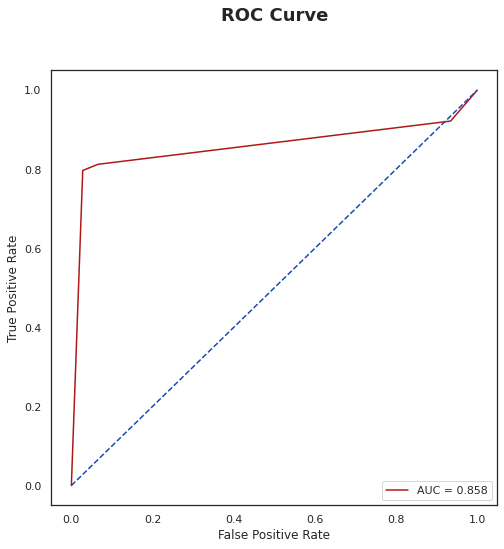

  
 ---------------------------------------------------------------------------------------------------- 
 
  #####  RandomForestClassifier algorithm  #####
 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       107
           1       0.90      0.88      0.89        64

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171

ROC AUC score:  0.91
Accuracy Score: 0.918



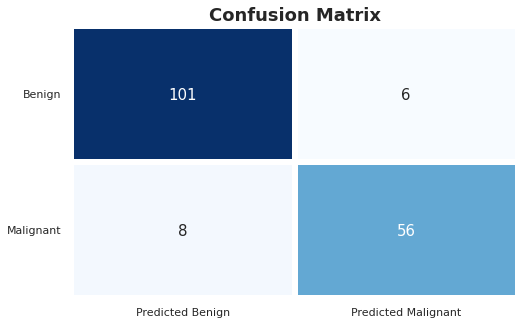

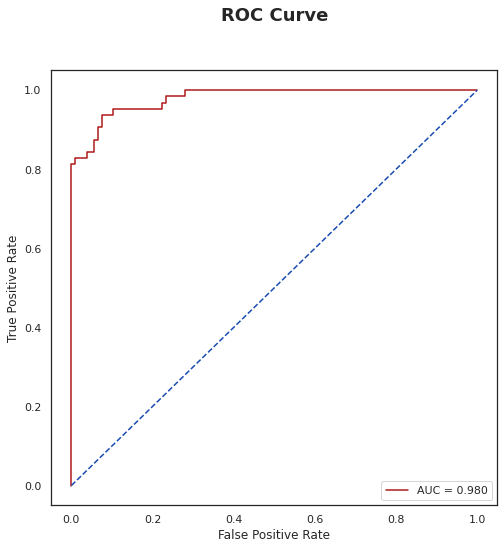

  
 ---------------------------------------------------------------------------------------------------- 
 


In [28]:
results = pd.DataFrame(columns=["DT","RF"], index=range(3))

# Some parameters previously found as best parameters have not been set because they are already present by default
classifier = [DecisionTreeClassifier(max_depth=DT_best.best_params_["max_depth"], max_features=DT_best.best_params_["max_features"], random_state=DT_best.best_params_["random_state"]),RandomForestClassifier(max_depth=RF_best.best_params_["max_depth"], max_features=RF_best.best_params_["max_features"], n_estimators=RF_best.best_params_["n_estimators"], random_state=12)]
names = ["DecisionTreeClassifier", "RandomForestClassifier"]
k = 0

for i in classifier:
    print("\033[1m", "\033[96m", "##### ", names[k], "algorithm  #####\n", "\033[0m")
    i.fit(X_train_res, y_train_res)   # fit testing data
    y_pred = i.predict(X_test)   # use predict(...) function that works on top of the testing model and makes use of the learned label
    y_prob = i.predict_proba(X_test)[:,1]   # predict probabilities, using predict_proba(...) function

    # Metrics
    results.iloc[0, k] = round(precision_score(y_test, y_pred), 2)   # compute the precision
    results.iloc[1, k] = round(roc_auc_score(y_test, y_pred), 2)   # compute the Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    results.iloc[2, k] = round(accuracy_score(y_test, y_pred), 3)   # compute the accuracy classification score
    cm = confusion_matrix(y_test, y_pred)   # compute the confusion matrix
    
    print(classification_report(y_test, y_pred))   # build a text report showing the main classification metrics, using classification_report(...) function
    print("ROC AUC score: ", results.iloc[1, k])
    print("Accuracy Score: {}\n".format(results.iloc[2, k]))

    # We visualize the confusion matrix
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, cmap="Blues", annot=True, fmt="d", linewidths=5, cbar=False, annot_kws={"fontsize":15}, yticklabels=["Benign", "Malignant"], xticklabels=["Predicted Benign", "Predicted Malignant"])
    plt.yticks(rotation=0)
    plt.title("Confusion Matrix", y=1.1, weight="bold", fontsize=18)
    plt.show()

    # We visualize the ROC curve
    print()
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    sns.set_theme(style="white")
    plt.figure(figsize=(8, 8))
    plt.plot(false_positive_rate, true_positive_rate, color ="#b01717", label="AUC = %0.3f" % roc_auc)
    plt.legend(loc="lower right")
    plt.plot([0, 1], [0, 1], linestyle="--", color="#174ab0")
    plt.axis("tight")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.title("ROC Curve", y=1.1, weight="bold", fontsize=18)
    plt.show()
    k += 1

    print("\033[1m", "\033[96m", "\n", "-"*100, "\n", "\033[0m")

## **6. Conclusion**
In this section we conclude by viewing the metrics of the models obtained previously in a heatmap, allowing us to compare them with each other.

DT 0.8985105140186915
DT TUNING 0.8844188084112149
RF 0.9063230140186916
RF TUNING 0.9094626168224299


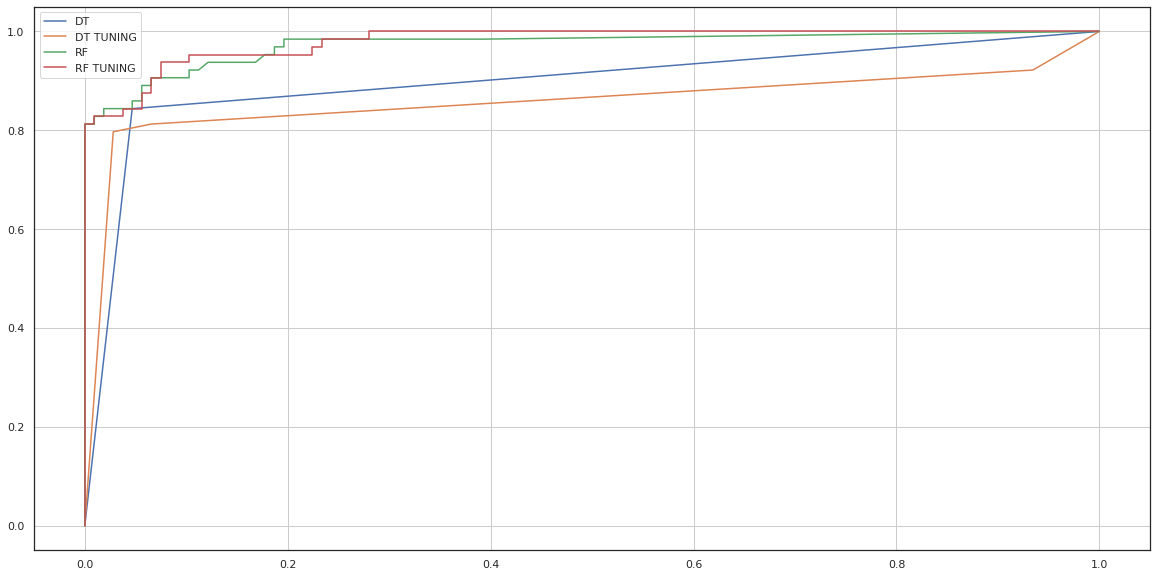

In [29]:
plt.figure(figsize=(20,10))
plt.grid()
auc_plot(dtc, X_test, y_test, label="DT")
auc_plot(classifier[0], X_test, y_test, label="DT TUNING")
auc_plot(rfc, X_test, y_test, label="RF")
auc_plot(classifier[1], X_test, y_test, label="RF TUNING")
plt.legend(loc="bottom right")

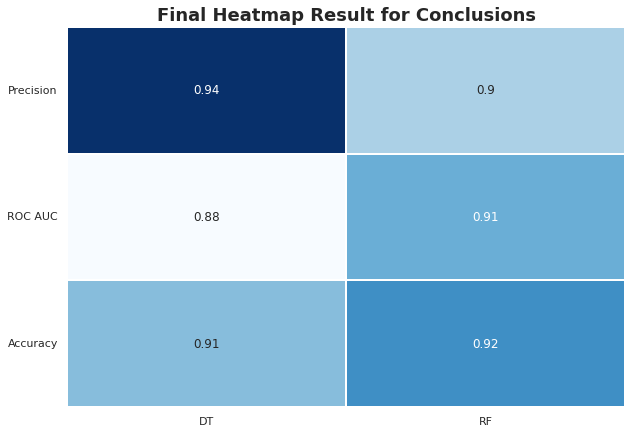

In [30]:
plt.figure(figsize=(10, 7))
sns.heatmap(results[results.columns.to_list()].astype(float), cmap="Blues", annot=True, linewidths=1, cbar=False, annot_kws={"fontsize":12}, yticklabels = ["Precision", "ROC AUC", "Accuracy"])
sns.set(font_scale=1.5)
plt.yticks(rotation=0)
plt.title("Final Heatmap Result for Conclusions", y=1.1, weight="bold", fontsize=18)
plt.show()